<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Keltner_Channel_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
plt.style.use('fivethirtyeight')

In [15]:
def keltner_channels(data,window=20,atr_multiplier=1):
  keltner_channels={}

  #calculating the typical price
  typical_price=(data['High']+data['Low']+data['Adj Close'])/3

  #calculating the exponential moving avg
  exponential_moving_average=typical_price.ewm(span=window, adjust=False).mean()

  #calculating
  true_range = (data['High'] - data['Low']).combine(
      (abs(data['High'] - exponential_moving_average)).combine(abs(data['Low'] - exponential_moving_average), np.maximum), np.maximum)
  average_true_range=true_range.ewm(span=window,adjust=False).mean()

  #calculating the upper and lower channel
  keltner_channels['upper']=exponential_moving_average + atr_multiplier*average_true_range
  keltner_channels['lower']=exponential_moving_average - atr_multiplier*average_true_range

  #calculaing the middle channel

  keltner_channels['middle']=exponential_moving_average

  return keltner_channels

In [18]:
def plot_keltner_channels(data,keltner_channels):
  fig,ax=plt.subplots(figsize=(14,7))

  ax.plot(data.index,data['Adj Close'],label='Closing price',linewidth=1)

  ax.plot(keltner_channels['upper'],label='Upper',linewidth=1)
  ax.plot(keltner_channels['middle'],label='Middle',linewidth=1)
  ax.plot(keltner_channels['lower'],label='Lower',linewidth=1)

  #finding the area between the bands

  ax.fill_between(keltner_channels['upper'].index,keltner_channels['upper'],keltner_channels['lower'],color='Grey',alpha=0.5)

  #find the buy and sell points

  crossed=False
  buy_signal_number=0
  sell_signal_number=0
  buy_signal_restraint=1
  sell_signal_restraint=1

  for i in range(len(data)):
    if data['Adj Close'].iloc[i] < keltner_channels['lower'].iloc[i]:
      buy_signal_number=buy_signal_number+1
      sell_signal_number=0
      if buy_signal_number >= buy_signal_restraint and crossed==False:
        ax.plot(data.index[i],data['Adj Close'].iloc[i],marker='^',markersize=10,color='green')
        crossed=True
        buy_signal_number=0

    elif data['Adj Close'].iloc[i] > keltner_channels['upper'].iloc[i]:
      sell_signal_number=sell_signal_number+1
      buy_signal_number=0
      if sell_signal_number >= sell_signal_restraint and crossed==True:
        ax.plot(data.index[i],data['Adj Close'].iloc[i],marker='v',markersize=10,color='Red')
        crossed=False
        sell_signal_number=0

  ax.set_title('Keltner Channel with Buy/Sell Signas') # Moved the labels outside the loop
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.legend()
  plt.show()

[*********************100%%**********************]  1 of 1 completed


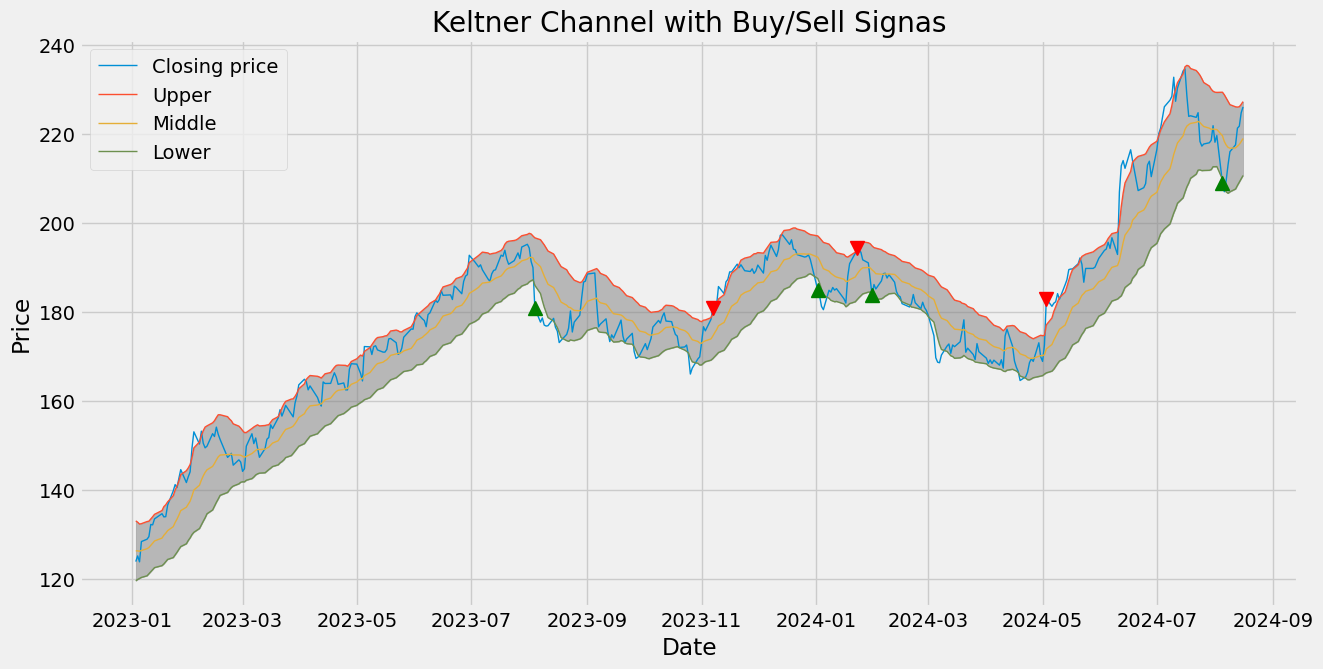

In [19]:
end_date=datetime.today().strftime('%Y-%m-%d')
data=yf.download('AAPL',start='2023-01-01',end=end_date)

keltner_channel = keltner_channels(data)
plot_keltner_channels(data,keltner_channel)